In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# EDA

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Get an overview of the data
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Check number of null values
print(titanic_df.shape)
titanic_df.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Given that more than 50% of the cabin is null, the column can be dropped 

In [7]:
# Drop cabin column
titanic_df.drop('Cabin', axis=1, inplace=True)

# Drop rows with null ages
titanic_df.dropna(subset=['Age'], inplace=True)

# Impute embarked
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No more null in the dataset and the cabin column has been dropped.

In [8]:
# Checks for duplicate rows
print(titanic_df.duplicated().values.any())
print(titanic_df.shape)

False
(714, 11)


There are no duplicate rows, so no rows will be dropped.

In [9]:
numerical_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns

num_df = titanic_df[numerical_columns]
num_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [10]:
categorical = titanic_df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [11]:
print(titanic_df['Sex'].unique())
print(titanic_df[categorical].nunique())

['male' 'female']
Name        714
Sex           2
Ticket      542
Embarked      3
dtype: int64


Columns sex and embarked will be one hot encoded while tickets will be dropped

In [12]:
# Get unique title via regular expression to extract title from the Name column (expand false to return series)
titles_extracted = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titles_extracted.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

c:\Users\willi\Desktop\_77\_Activities\venvs\py-acts\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willi\Desktop\_77\_Activities\venvs\py-acts\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willi\Desktop\_77\_Activities\venvs\py-acts\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


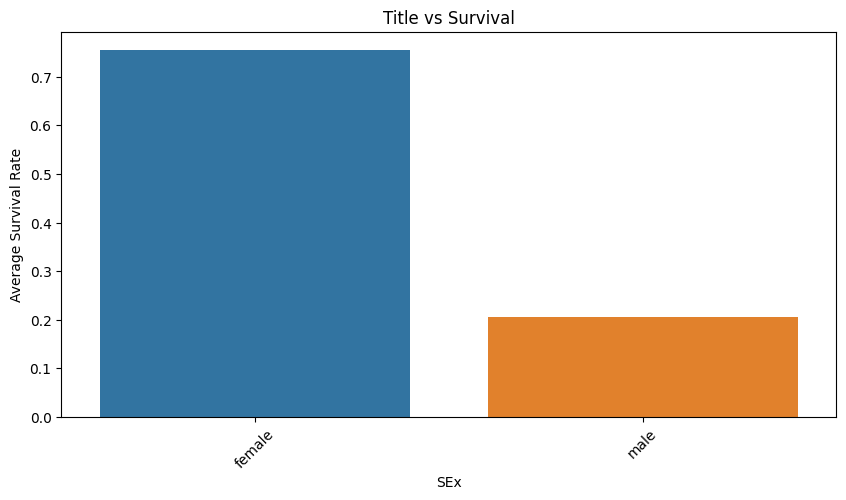

In [13]:
# Create new titles 
titanic_df['Title'] = titles_extracted

# Calculate average survival rate
title_ave_survival_rate = titanic_df.groupby("Sex")['Survived'].mean().sort_values(ascending=False)

# Visualize the data
plt.figure(figsize=(10,5))
sns.barplot(x=title_ave_survival_rate.index, y=title_ave_survival_rate.values)
plt.xlabel('SEx')
plt.ylabel('Average Survival Rate')
plt.title('Title vs Survival')
plt.xticks(rotation=45)


plt.show()

In [14]:
# Columns to One Hot Encode
columns_to_encode = ['Sex', 'Embarked', 'Title']

# Perform OHE
one_hot_df = pd.get_dummies(titanic_df[columns_to_encode], drop_first=True)

# Drop original column that were one hot encoded
titanic_df = titanic_df.drop(columns=columns_to_encode)

# Concat encoded columns
final_titanic_df = pd.concat([titanic_df, one_hot_df], axis=1)
final_titanic_df = final_titanic_df.drop(['Name','Ticket'], axis=1)
final_titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,22.0,1,0,7.2500,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,...,False,False,False,False,False,True,False,False,False,False


## Model Training

In [15]:
final_titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,22.0,1,0,7.2500,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [16]:
final_titanic_df.to_csv('final_titanic_df.csv')

1. Using SKLearn's decision trees, create a model predicting the 'Survived' variable in the titanic dataset. Remove rows if needed.


In [17]:
features = final_titanic_df.drop('Survived', axis=1)
labels = final_titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=77)

# Initialize Models

svm = SVC(random_state=77)
dt = DecisionTreeClassifier(random_state=77)
rf = RandomForestClassifier(random_state=77)

models = {'SVM': svm, 'Decision Tree:': dt, 'Random Forest': rf}

print("Metric Scores")
for name, model in models.items():
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    b_accuracy_score = balanced_accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    print(f"\n{name}")
    print('-------')
    print("Accuracy:", accuracy)
    print("Balance Accuracy Score", b_accuracy_score)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)




Metric Scores

SVM
-------
Accuracy: 0.6083916083916084
Balance Accuracy Score 0.5572420634920635
Precision: 0.8888888888888888
Recall: 0.12698412698412698
F1 Score: 0.2222222222222222

Decision Tree:
-------
Accuracy: 0.7622377622377622
Balance Accuracy Score 0.7554563492063492
Precision: 0.7457627118644068
Recall: 0.6984126984126984
F1 Score: 0.7213114754098361

Random Forest
-------
Accuracy: 0.8111888111888111
Balance Accuracy Score 0.8025793650793651
Precision: 0.8214285714285714
Recall: 0.7301587301587301
F1 Score: 0.773109243697479


2. F1 score of original model
- SVM F1 Score: 0.2222222222222222
- Decision Tree F1 Score: 0.7213114754098361
- RF F1 Score: 0.773109243697479

3. Second model using hyperparameter tuning and improving precision and recall


In [18]:
from sklearn.model_selection import GridSearchCV

features = final_titanic_df.drop('Survived', axis=1)
labels = final_titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=77)

parameters = { 'max_depth': [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100, None],
               'criterion': ['gini', 'entropy'],
               'max_features': [0.3, 0.5, 0.7, 0.9, None],
               'min_samples_leaf': [1, 2, 3, 5, 7, 10, 15],
               'min_samples_split': [2, 3, 5, 6, 10]}

grid_search = DecisionTreeClassifier(random_state=22)
grid_search = GridSearchCV(grid_search, parameters, cv=6, scoring='accuracy', n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)
print("Best params: ", grid_result.best_params_)

Best params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [19]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=2, random_state=77)
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
b_accuracy_score = balanced_accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print("Decision Trees")
print('-------')
print("Accuracy:", accuracy)
print("Balance Accuracy Score", b_accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Decision Trees
-------
Accuracy: 0.7972027972027972
Balance Accuracy Score 0.7816468253968254
Precision: 0.8541666666666666
Recall: 0.6507936507936508
F1 Score: 0.7387387387387387


In [20]:
from sklearn.model_selection import GridSearchCV

final_titanic_df = final_titanic_df.drop(['PassengerId'], axis=1)
features = final_titanic_df.drop('Survived', axis=1)
labels = final_titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=77)

parameters = { 'max_depth': [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100, None],
               'criterion': ['gini', 'entropy'],
               'max_features': [0.3, 0.5, 0.7, 0.9, None],
               'min_samples_leaf': [1, 2, 3, 5, 7, 10, 15],
               'min_samples_split': [2, 3, 5, 6, 10]}

grid_search = DecisionTreeClassifier(random_state=22)
grid_search = GridSearchCV(grid_search, parameters, cv=6, scoring='accuracy', n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)
print("Best params: ", grid_result.best_params_)

Best params:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [22]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=0.5, min_samples_leaf=5, min_samples_split=2, random_state=77)
dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
b_accuracy_score = balanced_accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
print("Decision Trees")
print('-------')
print("Accuracy:", accuracy)
print("Balance Accuracy Score", b_accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Decision Trees
-------
Accuracy: 0.7902097902097902
Balance Accuracy Score 0.7720238095238096
Precision: 0.8666666666666667
Recall: 0.6190476190476191
F1 Score: 0.7222222222222222


After removing passenger ID, precision is improved but recall is decreased.

Which is better, precision or recall? State the advantages and disadvantages of each of the two metrics for the titanic situation.

Precision Advantages:
- High precision means that the model makes fewer false positive errors. In the Titanic context, this would mean fewer instances where the model incorrectly predicts that someone survives when they actually did not.

Precision Disadvantages
- A high-precision model may miss out on some true positives (actual survivors)

Recall advantages:
- High recall ensures that the model identifies most of the actual survivors since it takes into account False Negatives.

Recall disadvantages:
- A high-recall model may incorrectly predict that more non-survivors would survive

Neither is better. F1 score is the better metric since it incorporates both precision and recall since it is the harmonic mean between precision and recall.